___
# Stochastic Gradient Descent (SGD_v1)
## Loss function, optimizer, learning rate & batch size
## Red wine dataset
___

In [27]:
import pandas as pd
from IPython.display import display
from tensorflow import keras
from tensorflow.keras import layers

data = 'C:/Users/crist/Desktop/Python_Stuff/red-wine.csv'
wine_data = pd.read_csv(data)

## Creating training and validation splits

In [29]:
df_train = wine_data.sample(frac = 0.7, random_state= 0)
df_valid = wine_data.drop(df_train.index)
display(df_train.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


## Scale to (0, 1)

In [30]:
max_ = df_train.max(axis = 0)
min_ = df_train.min(axis= 0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

## Splitting features and target

In [31]:
X_train = df_train.drop('quality', axis = 1)
X_valid = df_valid.drop('quality', axis= 1)
y_train = df_train['quality']
y_valid = df_valid['quality']

## Building a model

In [32]:
model = keras.Sequential([
layers.Dense(512, activation = 'relu', input_shape = [11]),
layers.Dense(512, activation = 'relu'),
layers.Dense(512, activation = 'relu'),
layers.Dense(1)

])

## Compiling the optimizer and loss function

In [33]:
model.compile(
    optimizer= 'adam',
    loss= 'mae'
)

## Getting started with the training

In [34]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 256, # feeding 256 rows of the training data at a time (epochs)
    epochs = 10 # times all the way through the dataset


)

Epoch 1/10
5/5 [==============================] - 4s 298ms/step - loss: 0.3152 - val_loss: 0.1424
Epoch 2/10
5/5 [==============================] - 1s 118ms/step - loss: 0.1555 - val_loss: 0.1272
Epoch 3/10
5/5 [==============================] - 1s 114ms/step - loss: 0.1307 - val_loss: 0.1209
Epoch 4/10
5/5 [==============================] - 1s 112ms/step - loss: 0.1187 - val_loss: 0.1169
Epoch 5/10
5/5 [==============================] - 1s 125ms/step - loss: 0.1133 - val_loss: 0.1090
Epoch 6/10
5/5 [==============================] - 1s 110ms/step - loss: 0.1104 - val_loss: 0.1054
Epoch 7/10
5/5 [==============================] - 1s 110ms/step - loss: 0.1055 - val_loss: 0.1057
Epoch 8/10
5/5 [==============================] - 1s 118ms/step - loss: 0.1043 - val_loss: 0.1020
Epoch 9/10
5/5 [==============================] - 1s 116ms/step - loss: 0.1014 - val_loss: 0.1038
Epoch 10/10
5/5 [==============================] - 1s 115ms/step - loss: 0.1032 - val_loss: 0.1007


## Converting the training history to a dataframe

<AxesSubplot:>

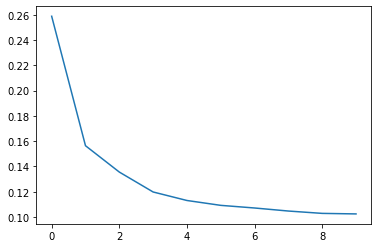

In [35]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()